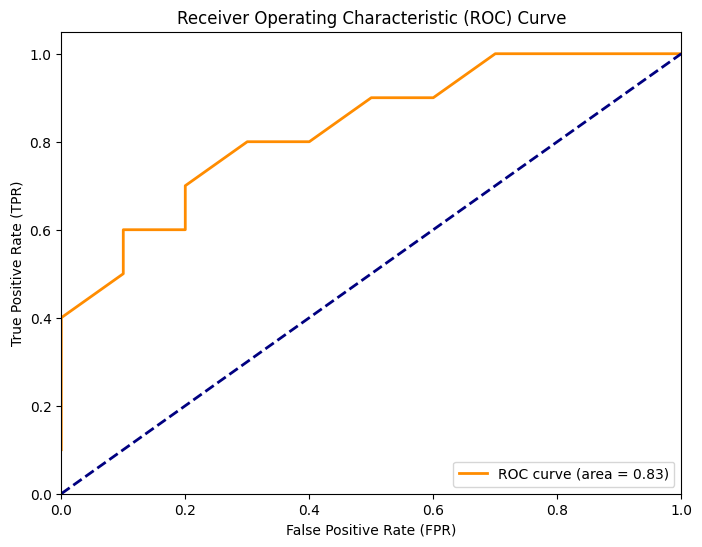

FPR: [1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.7, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1]
TPR: [1.0, 0.8, 0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.4, 0.4, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data
labels = np.array(['Positive'] * 10 + ['Negative'] * 10)
scores = np.array([25, 21, 20, 19, 18, 17, 14, 13, 10, 5, 18, 15, 13, 12, 10, 8, 5, 4, 3, 3])

# Calculate FPR, TPR for different score thresholds
thresholds = range(3, 26)
fpr_list = []
tpr_list = []

for threshold in thresholds:
    predictions = scores >= threshold
    true_positives = np.sum((labels == 'Positive') & predictions)
    false_positives = np.sum((labels == 'Negative') & predictions)
    true_negatives = np.sum((labels == 'Negative') & ~predictions)
    false_negatives = np.sum((labels == 'Positive') & ~predictions)
    
    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_list, tpr_list))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show(block=True)
print('FPR:',tpr_list)
print('TPR:',fpr_list)

In [ ]:
import pandas as pd 
df = pd.read_csv('heart_disease.csv') 
data = df.to_numpy() x = data[:,0:1] y = data[:,1]

import sklearn.linear_model as lm
lr = lm.LogisticRegression() 
lr.fit(x, y)
im port matplotlib.pyplot as plt 
plt.scatter(data[:,0], data[:,1]) 
import numpy as np 
ages = np.arange(100).reshape((100,1)) 
probs = lr.predict_proba(ages) 
plt.scatter(ages[:,0], probs[:,1]) 
plt.show()




In [8]:
import pandas as pd
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_excel("Immunotherapy.xlsx", sheet_name="training data set")

X = data[["age", "number_of_warts", "type"]]  
y = data["Result_of_treatment"]  

model = LogisticRegression()
model.fit(X, y)

weights = model.coef_
intercept = model.intercept_

print("Coefficients (Weights):")
for feature, weight in zip(X.columns, weights[0]):
    print(f"{feature}: {weight}")

print(f"Intercept: {intercept[0]}")
